[Day 25 - Advent of Code 2023](https://adventofcode.com/2023/day/25)

<article class="day-desc">
 <h2>
  --- Day 25: Snowverload ---
 </h2>
 <p>
  <em>
   Still
  </em>
  somehow without snow, you go to the last place you haven't checked: the center of Snow Island, directly below the waterfall.
 </p>
 <p>
  Here, someone has clearly been trying to fix the problem. Scattered everywhere are hundreds of weather machines, almanacs, communication modules, hoof prints, machine parts, mirrors, lenses, and so on.
 </p>
 <p>
  Somehow, everything has been
  <em>
   wired together
  </em>
  into a massive snow-producing apparatus, but nothing seems to be running. You check a tiny screen on one of the communication modules:
  <code>
   Error 2023
  </code>
  . It doesn't say what
  <code>
   Error 2023
  </code>
  means, but it
  <em>
   does
  </em>
  have the phone number for a support line printed on it.
 </p>
 <p>
  "Hi, you've reached Weather Machines And So On, Inc. How can I help you?" You explain the situation.
 </p>
 <p>
  "Error 2023, you say? Why, that's a power overload error, of course! It means you have too many components plugged in. Try unplugging some components and--" You explain that there are hundreds of components here and you're in a bit of a hurry.
 </p>
 <p>
  "Well, let's see how bad it is; do you see a
  <em>
   big red reset button
  </em>
  somewhere? It should be on its own module. If you push it, it probably won't fix anything, but it'll report how overloaded things are." After a minute or two, you find the reset button; it's so big that it takes two hands just to get enough leverage to push it. Its screen then displays:
 </p>
 <pre><code>SYSTEM OVERLOAD!

Connected components would require
power equal to at least <em class="star">100 stars</em>!
</code></pre>
 <p>
  "Wait,
  <em>
   how
  </em>
  many components did you say are plugged in? With that much equipment, you could produce snow for an
  <em>
   entire
  </em>
  --" You disconnect the call.
 </p>
 <p>
  You have nowhere near that many stars - you need to find a way to disconnect at least half of the equipment here, but it's already Christmas! You only have time to disconnect
  <em>
   three wires
  </em>
  .
 </p>
 <p>
  Fortunately, someone left a wiring diagram (your puzzle input) that shows
  <em>
   how the components are connected
  </em>
  . For example:
 </p>
 <pre><code>jqt: rhn xhk nvd
rsh: frs pzl lsr
xhk: hfx
cmg: qnr nvd lhk bvb
rhn: xhk bvb hfx
bvb: xhk hfx
pzl: lsr hfx nvd
qnr: nvd
ntq: jqt hfx bvb xhk
nvd: lhk
lsr: lhk
rzs: qnr cmg lsr rsh
frs: qnr lhk lsr
</code></pre>
 <p>
  Each line shows the
  <em>
   name of a component
  </em>
  , a colon, and then
  <em>
   a list of other components
  </em>
  to which that component is connected. Connections aren't directional;
  <code>
   abc: xyz
  </code>
  and
  <code>
   xyz: abc
  </code>
  both represent the same configuration. Each connection between two components is represented only once, so some components might only ever appear on the left or right side of a colon.
 </p>
 <p>
  In this example, if you disconnect the wire between
  <code>
   hfx
  </code>
  /
  <code>
   pzl
  </code>
  , the wire between
  <code>
   bvb
  </code>
  /
  <code>
   cmg
  </code>
  , and the wire between
  <code>
   nvd
  </code>
  /
  <code>
   jqt
  </code>
  , you will
  <em>
   divide the components into two separate, disconnected groups
  </em>
  :
 </p>
 <ul>
  <li>
   <code>
    <em>
     9
    </em>
   </code>
   components:
   <code>
    cmg
   </code>
   ,
   <code>
    frs
   </code>
   ,
   <code>
    lhk
   </code>
   ,
   <code>
    lsr
   </code>
   ,
   <code>
    nvd
   </code>
   ,
   <code>
    pzl
   </code>
   ,
   <code>
    qnr
   </code>
   ,
   <code>
    rsh
   </code>
   , and
   <code>
    rzs
   </code>
   .
  </li>
  <li>
   <code>
    <em>
     6
    </em>
   </code>
   components:
   <code>
    bvb
   </code>
   ,
   <code>
    hfx
   </code>
   ,
   <code>
    jqt
   </code>
   ,
   <code>
    ntq
   </code>
   ,
   <code>
    rhn
   </code>
   , and
   <code>
    xhk
   </code>
   .
  </li>
 </ul>
 <p>
  Multiplying the sizes of these groups together produces
  <code>
   <em>
    54
   </em>
  </code>
  .
 </p>
 <p>
  Find the three wires you need to disconnect in order to divide the components into two separate groups.
  <em>
   What do you get if you multiply the sizes of these two groups together?
  </em>
 </p>
</article>


In [61]:
import helpers
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [62]:
puzzle_input = helpers.import_input(25)

## Part 1

In [63]:
test_puzzle_input_part_1 = """jqt: rhn xhk nvd
rsh: frs pzl lsr
xhk: hfx
cmg: qnr nvd lhk bvb
rhn: xhk bvb hfx
bvb: xhk hfx
pzl: lsr hfx nvd
qnr: nvd
ntq: jqt hfx bvb xhk
nvd: lhk
lsr: lhk
rzs: qnr cmg lsr rsh
frs: qnr lhk lsr""".splitlines()

## Networkx

This implementation uses the [Networkx](https://networkx.org/) library to represent the graph and find the connected components.

In [64]:
def make_graph(input):
    """Make a graph from the input"""
    graph = nx.Graph()
    for line in input:
        source, targets = line.split(':')
        source = source.strip()
        targets = targets.strip().split()
        for target in targets:
            graph.add_edge(source, target)
    return graph

def part_1(input):
    """Part 1 solver"""
    graph = make_graph(input)
    cut_value, partion = nx.stoer_wagner(graph)
    return len(partion[0]) * len(partion[1])


assert part_1(test_puzzle_input_part_1) == 54

In [65]:
part_1(puzzle_input)

572000

## Manual

This implementation uses a manual approach to find the connected components.

### Graph

In [66]:
class Edge:
    """An edge class"""
    def __init__(self, v1, v2, weight=1):
        self.v1 = v1
        self.v2 = v2
        self.weight = weight
        self.key = self.make_key()

    def make_key(self):
        vertices = sorted([self.v1, self.v2])
        return f"{vertices[0]}_{vertices[1]}"

    def get_key(self):
        return self.key

    def __repr__(self):
        return f"Edge({self.key})"

    def __str__(self):
        return f"({self.key})"
    
    def __eq__(self, other):
        return self.key == other.key
    
    def __hash__(self):
        return hash(self.key)
    
    def __lt__(self, other):
        return self.key < other.key
    
    def __gt__(self, other):
        return self.key > other.key
    
    def __le__(self, other):
        return self.key <= other.key
    
    def __ge__(self, other):
        return self.key >= other.key
    
    def __ne__(self, other):
        return self.key != other.key
    
    def __cmp__(self, other):
        return self.key.__cmp__(other.key)    

    def get_vertices(self):
        return self.v1, self.v2
    
    def replace_vertex(self, old_vertex, new_vertex):
        if self.v1 == old_vertex:
            self.v1 = new_vertex
        elif self.v2 == old_vertex:
            self.v2 = new_vertex

        self.key = self.make_key()

class Vertex:
    """A vertex class"""
    def __init__(self, name):
        self.name = name
        self.edges = []
        self.G = None

    def add_edge(self, edge):
        self.edges.append(edge)

    def remove_edge(self, edge):
        if edge in self.edges:
            self.edges.remove(edge)
        self.G.on_edge_removed(edge)

    def remove_edges(self):
        for edge in self.edges:
            edge.G.remove_edge(edge)

    def get_edge(self, edge_key: str) -> Edge:
        """get edge regardless of direction"""
        for edge in self.edges:
            if edge.get_key() == edge_key:
                return edge
            
        return None

    def get_edges(self):
        return self.edges

    def get_name(self):
        return self.name
    
    def __repr__(self):
        return f"Vertex({self.name})"

    def __str__(self):
        return self.name
    
    def __getitem__(self, key):
        return self.edges[key]
    
    def __eq__(self, other):
        return self.name == other.name
    
    def __hash__(self):
        return hash(self.name)
    
    def __lt__(self, other):
        return self.name < other.name
    
    def __gt__(self, other):
        return self.name > other.name
    
    def __le__(self, other):
        return self.name <= other.name
    
    def __ge__(self, other):
        return self.name >= other.name
    
    def __ne__(self, other):
        return self.name != other.name
    
    def __len__(self):
        return len(self.edges)
    
    def __cmp__(self, other):
        return self.name.__cmp__(other.name)

class Graph:
    """A graph class"""
    def __init__(self):
        self.vertices = {}
        self.edges = {}

    def add_vertex(self, vertex):
        vertex.G = self
        self.vertices[vertex.get_name()] = vertex

    def add_edge(self, v1_name, v2_name):
        if v1_name == v2_name:
            return
        
        v1 = self.get_or_add_vertex(v1_name)
        v2 = self.get_or_add_vertex(v2_name)

        edge = Edge(v1, v2)

        self.edges[edge.get_key()] = edge
        v1.add_edge(edge)
        v2.add_edge(edge)

    def remove_edge(self, edge: Edge):
        v1 = edge.v1
        v2 = edge.v2

        v1.remove_edge(edge)
        v2.remove_edge(edge)
        
        if str(edge) in self.edges:
            del self.edges[str(edge)]

    def remove_vertex(self, vertex: Vertex):
        for edge in vertex.get_edges():
            self.remove_edge(edge)

        if vertex.get_name() in self.vertices:
            del self.vertices[vertex.get_name()]

    def on_edge_removed(self, edge: Edge):
        """Called when an edge is removed from a vertex"""
        if str(edge) in self.edges:
            del self.edges[str(edge)]

    def get_or_add_vertex(self, vertex_name):
        if vertex_name in self.vertices:
            return self.vertices[vertex_name]
        else:
            vertex = Vertex(vertex_name)
            self.add_vertex(vertex)
            return vertex
        
    def to_networkx(self):
        """Return a networkx graph"""
        G = nx.Graph()
        for vertex in self.vertices.values():
            G.add_node(vertex.get_name())
            for edge in vertex.get_edges():
                v1, v2 = edge.get_vertices()
                G.add_edge(v1.get_name(), v2.get_name())
                
        return G

    def plot(self):
        """Plot the graph"""
        G = self.to_networkx()
        nx.draw(G, with_labels=True)
        plt.show()
        
    def to_ajacency_matrix(self):
        """Return the adjacency matrix of the graph"""
        matrix = np.zeros((len(self.vertices), len(self.vertices)))
        for edge in self.edges.values():
            v1_index = list(self.vertices.keys()).index(edge.v1.get_name())
            v2_index = list(self.vertices.keys()).index(edge.v2.get_name())
            matrix[v1_index, v2_index] = 1
            matrix[v2_index, v1_index] = 1

        return matrix
        
    def deepcopy(self):
        copied_graph = Graph()
        for vertex in self.vertices.values():
            copied_graph.add_vertex(Vertex(vertex.name))
        for edge in self.edges.values():
            v1_name = edge.v1.get_name()
            v2_name = edge.v2.get_name()
            copied_graph.add_edge(v1_name, v2_name)
        return copied_graph

    def __deepcopy__(self):
        return self.deepcopy()
    
    @staticmethod
    def make_from_input(input):
        """Make a graph from the input"""
        graph = Graph()
        for line in input:
            source, targets = line.split(':')
            source = source.strip()
            targets = targets.strip().split()
            for target in targets:
                graph.add_edge(source, target)

        return graph
    
    def __len__(self):
        return len(self.vertices)
    
    def __repr__(self):
        return f"Graph({self.vertices}, {self.edges})"

### Stoer-Wagner
[Stoer–Wagner algorithm - Wikipedia](https://en.wikipedia.org/wiki/Stoer%E2%80%93Wagner_algorithm)

## Phase 0


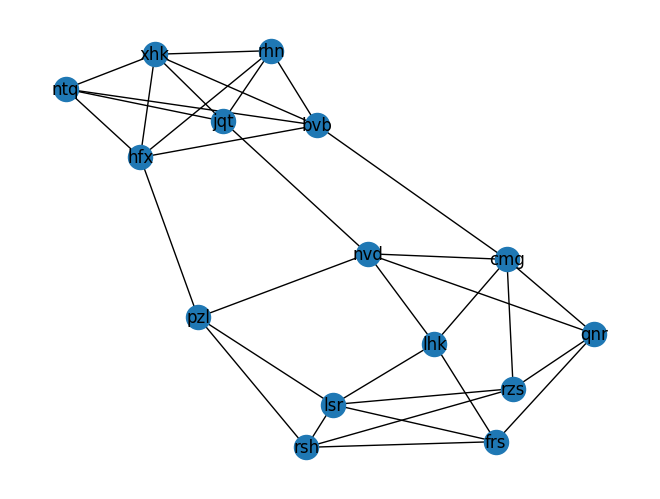

KeyboardInterrupt: 

In [69]:
INT_MAX = float('inf')
INT_MIN = float('-inf')

class StoerWagner:
    """A class for the Stoer-Wagner algorithm"""
    def __init__(self, graph, debug=False):
        self.graph = graph.deepcopy()
        self.vertices = [x for x in self.graph.vertices]
        self.V_i = 0
        self.debug = debug

    def run(self):
        """Run the algorithm"""
        min_cut = (INT_MAX, None)
        solutions = []

        if self.debug:
            print(f"## Phase {self.V_i}")
            self.graph.plot()   

        while len(self.graph) > 2:    
            S = self.minimum_cut_phase(self.graph)
            s = S[-1]
            t = S[-2]
            
            weight = sum([edge.weight for edge in t.get_edges()])
            if weight < min_cut[0]:
                min_cut = (weight, [x.get_name() for x in S])

            self.merge_vertices(s, t)
            
            if self.debug:
                self.V_i += 1
                solutions.append({"i": self.V_i, "graph": self.graph.deepcopy(), "S":S, "weight":weight, "s": s, "t": t})
                print(f"## Phase {self.V_i}")
                print("Merged vertices: ", s, t)
                print("weight: ", weight)
                      
                self.graph.plot()    

        partion1 = min_cut[1]
        partion2 = [vertex for vertex in self.vertices if vertex not in partion1]
        
        if self.debug:
            print(f"Min cut: {min_cut[0]}")
            print(f"Partion 1: {partion1}", len(partion1))
            print(f"Partion 2: {partion2}", len(partion2))
            
        return min_cut[0], partion1, partion2
        
    def minimum_cut_phase(self, G):
        """Find the min cut of the graph"""
        current_vertex = G.vertices[list(G.vertices)[0]]
        S = [current_vertex]
        V = G.vertices
        
        while len(S) is not len(V):
            edge = self.get_strongest_edge(current_vertex, S)
            current_vertex = edge.v2 if current_vertex != edge.v2 else edge.v1    
            S.append(current_vertex)
        
        return S

    def get_strongest_edge(self, vertex: Vertex, A, backstep=0):
        """Get the strongest edge of a vertex"""
        if backstep > len(A):
            raise ValueError("Backstab is too large")
        
        if backstep > 0:
            edges = [edge for edge in vertex.get_edges() if not (edge.v1 not in A and edge.v2 not in A)]
        else:
            edges = [edge for edge in vertex.get_edges() if edge.v1 not in A or edge.v2 not in A]

        if len(edges) == 0:
            backstep += 1
            return self.get_strongest_edge(A[-backstep], A, backstep)
        return max(edges, key=lambda x: x.weight, default=None)
    
    def merge_vertices(self, v1, v2):
        """Merge two vertices"""
        # Create a new vertex
        new_vertex = Vertex(f"[{v1.get_name()},{v2.get_name()}]")
        
        # merge the edges
        self.merge_edges(new_vertex, v1, v2)
        
        # add the new vertex and remove the old ones
        self.graph.add_vertex(new_vertex)
        self.graph.remove_vertex(v1)
        self.graph.remove_vertex(v2)
        
        self.remove_self_loops(new_vertex)

    def merge_edges(self, destination: Vertex, v1: Vertex, v2: Vertex):
        """connects the edges of source to destination and merges the weights"""
        edges = [x for x in v1.get_edges()]
        for edge in edges:        
            destination.add_edge(edge)
            v1.edges.remove(edge)
            edge.replace_vertex(v1, destination)
        
        edges = [x for x in v2.get_edges()]
        for edge in edges:
            edge.replace_vertex(v2, destination)
            v2.edges.remove(edge)
            exisiting_edge = destination.get_edge(edge.get_key())
            if exisiting_edge:
                exisiting_edge.weight += edge.weight
            else: 
                destination.add_edge(edge)
                
    def remove_self_loops(self, vertex: Vertex):
        """Remove self loops"""
        for edge in vertex.get_edges():
            if edge.v1 == edge.v2:
                vertex.remove_edge(edge)    
           
def part_1(input, debug=False):
    graph = Graph.make_from_input(input)
    stoer_wagner = StoerWagner(graph, debug)
    min_cut, partition1, partition2 = stoer_wagner.run()
    return len(partition1) * len(partition2)


assert part_1(test_puzzle_input_part_1, True) == 54

In [ ]:
part_1(puzzle_input)

: 